# TRAVEL INSURANCE PREDICTION

IMPORTING NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import pickle

IMPORTING THE DATASET

In [2]:
df = pd.read_csv('TravelInsurancePrediction.csv')

TO VIEW THE DATASET

In [3]:
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [4]:
df.tail()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1
1986,1986,34,Private Sector/Self Employed,Yes,500000,4,0,No,No,0


STATISTICAL SUMMARY OF THE DATASET

In [5]:
df.describe()

,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,573.741812,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [6]:
df.skew()

C:\Users\ROHAN\AppData\Local\Temp\ipykernel_10792\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Unnamed: 0         0.000000
Age                0.239625
AnnualIncome       0.078417
FamilyMembers      0.561197
ChronicDiseases    0.992872
TravelInsurance    0.595918
dtype: float64

# CLEANING THE DATASET

In [7]:
df.isnull().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [8]:
df.duplicated().sum()

0

VISUALIZATION

<AxesSubplot:xlabel='TravelInsurance', ylabel='count'>

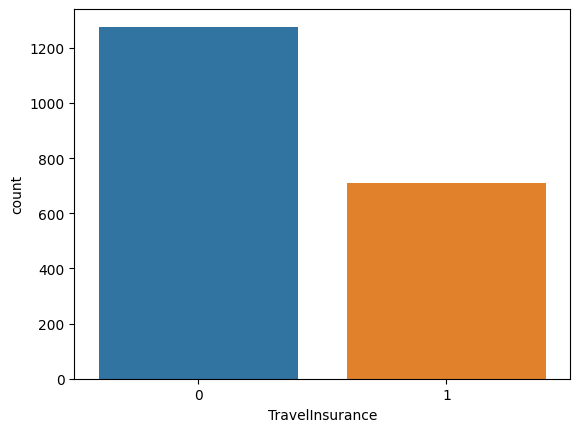

In [9]:
sns.countplot(data=df, x = 'TravelInsurance')

MOST OF THE PEOPLE ARE NOT TAKING TRAVEL INSURANCE

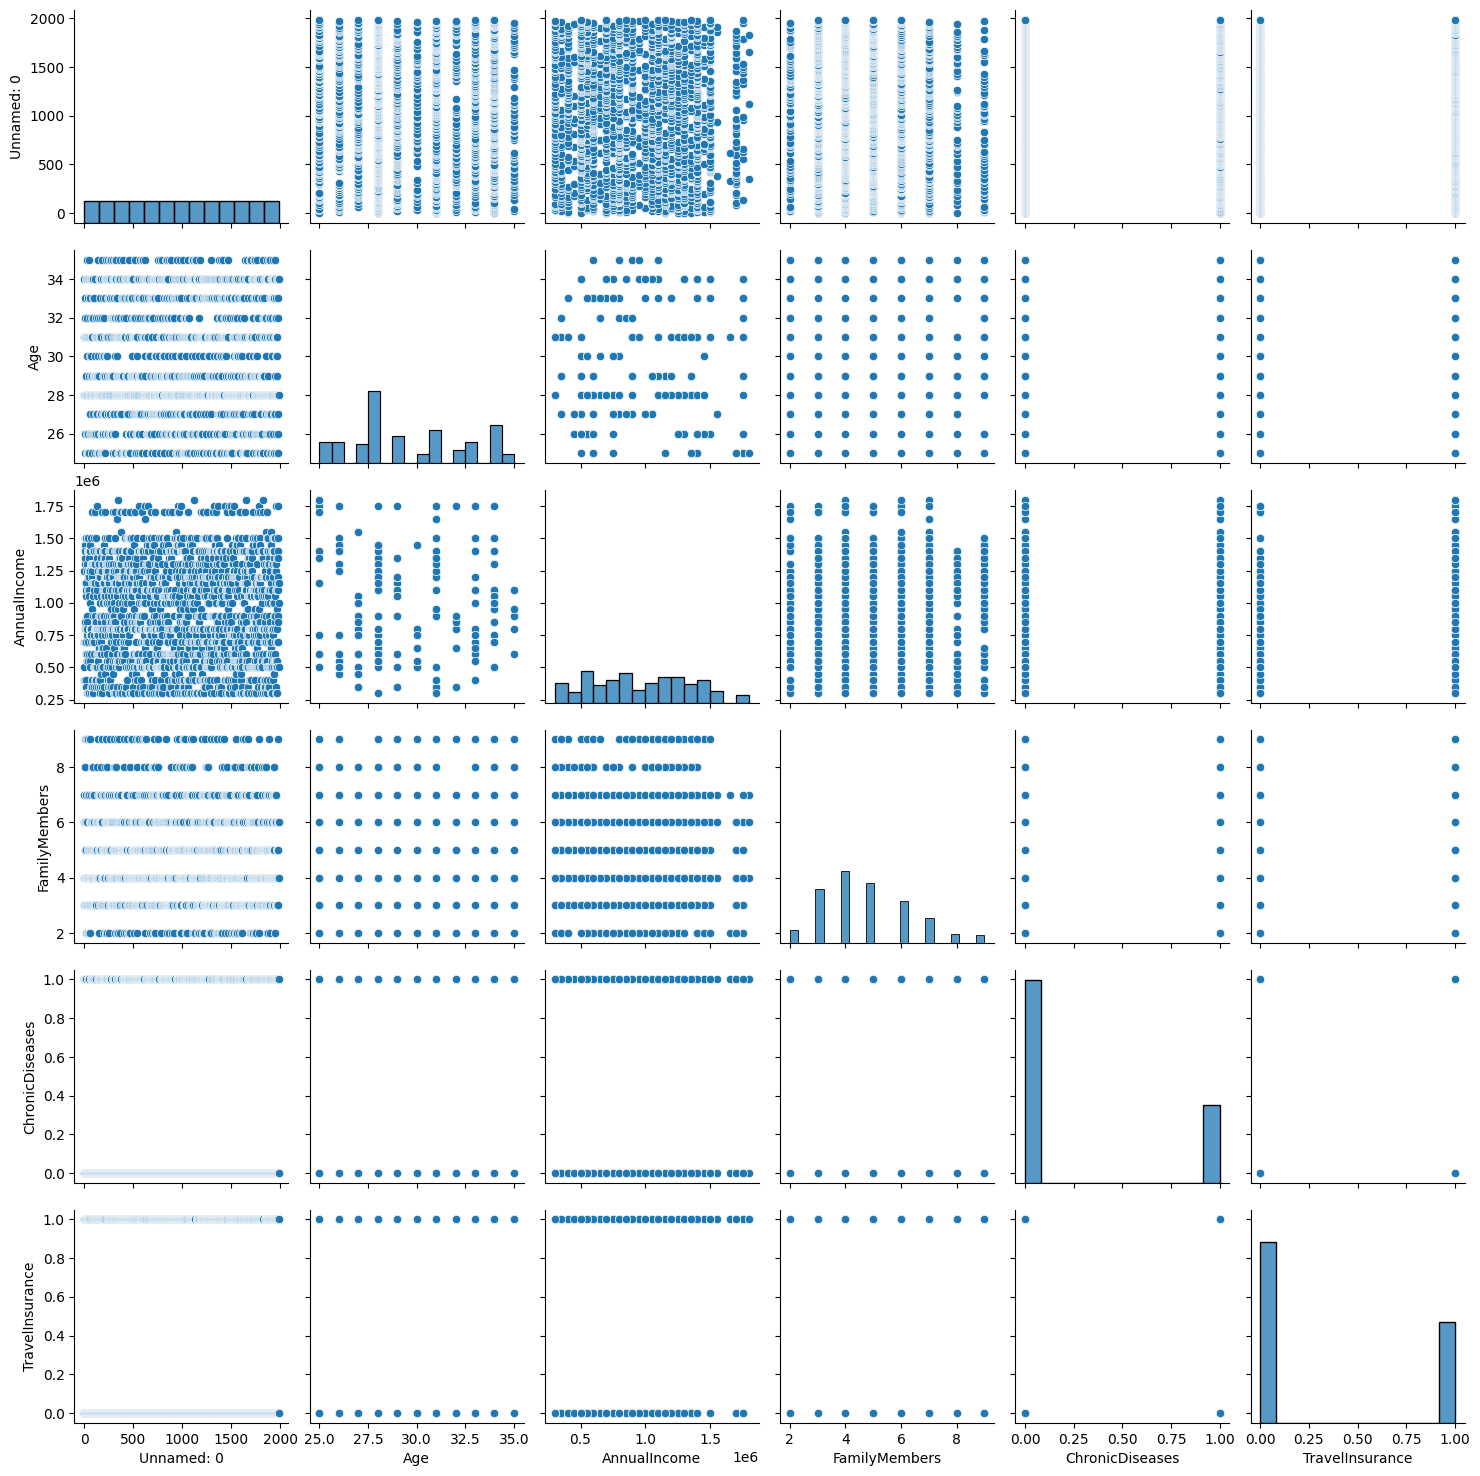

In [10]:
sns.pairplot(data=df)
plt.show()

C:\Users\ROHAN\AppData\Local\Temp\ipykernel_10792\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot:>

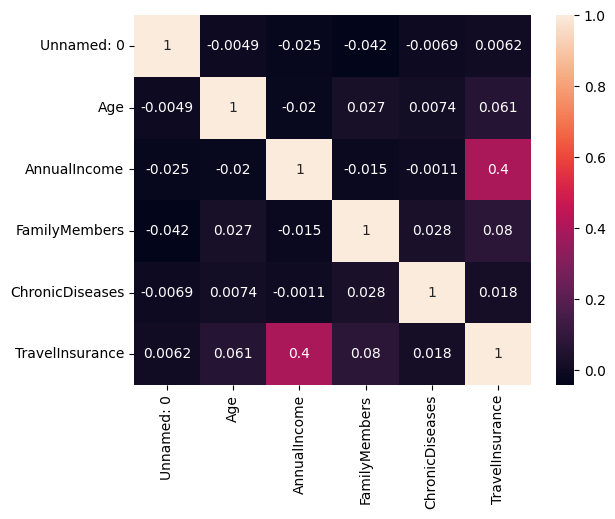

In [11]:
sns.heatmap(df.corr(),annot=True)

WE CAN SEE THAT ANNUAL INCOME IS THE ATTRIBUTE WITH THE HIGHEST WEIGHTAGE IN DETERMINING WHETHER TO TAKE INSURANCE OR NOT

# BUILDING THE MODEL

In [12]:
encoder = preprocessing.LabelEncoder()
df['Employment Type']= encoder.fit_transform(df['Employment Type'])
df['FrequentFlyer']= encoder.fit_transform(df['FrequentFlyer'])
df['EverTravelledAbroad']= encoder.fit_transform(df['EverTravelledAbroad'])
df['GraduateOrNot']= encoder.fit_transform(df['GraduateOrNot'])


In [13]:
X = df.drop(['Unnamed: 0','TravelInsurance','ChronicDiseases'],axis=1)
y = df['TravelInsurance']

In [14]:
X.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,FrequentFlyer,EverTravelledAbroad
0,31,0,1,400000,6,0,0
1,31,1,1,1250000,7,0,0
2,34,1,1,500000,4,0,0
3,28,1,1,700000,3,0,0
4,28,1,1,700000,8,1,0


In [15]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: TravelInsurance, dtype: int64

SPLITTING THE DATASET INTO TRAINING AND TESTING SET

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [17]:
lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

In [18]:
y_pred = lg.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [19]:
print('Accuracy = ',metrics.accuracy_score(y_test,y_pred))

Accuracy =  0.6381909547738693


In [21]:
pickle.dump(lg,open("Model.pkl","wb"))